In [82]:
import os
import math
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import librosa.display
import numpy as np
from tqdm import tqdm

%matplotlib inline

# Bell Sounds

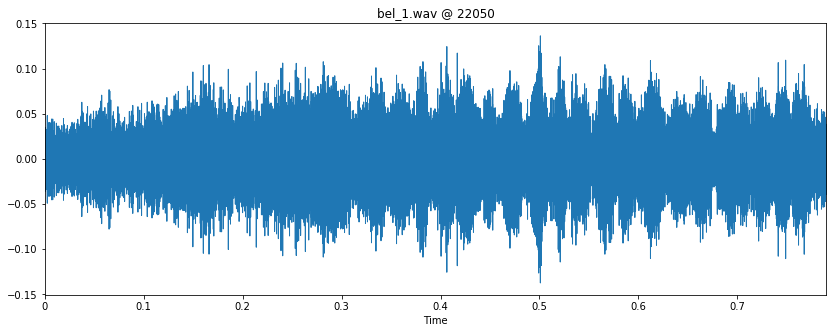

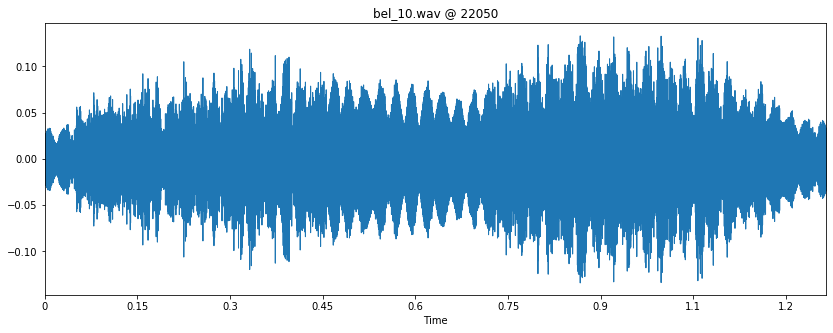

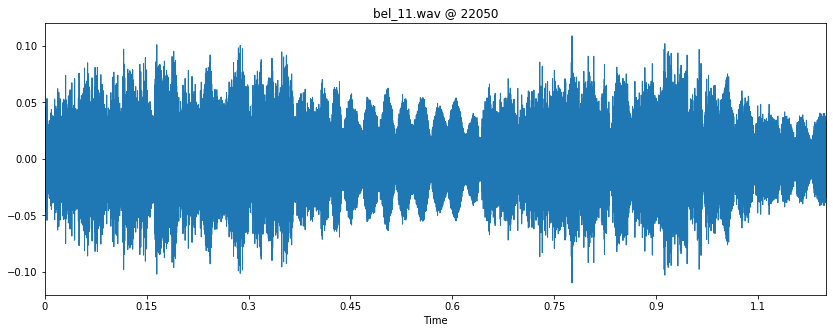

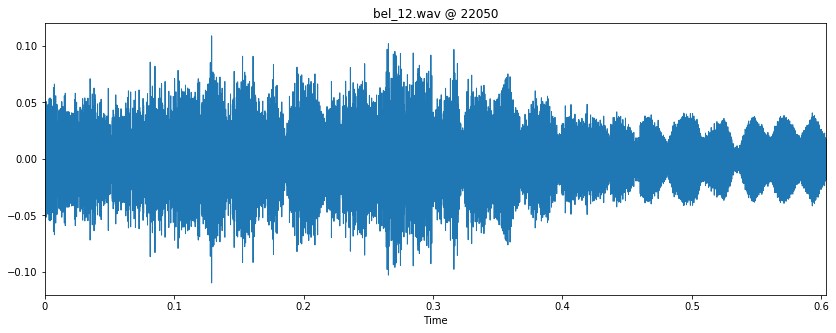

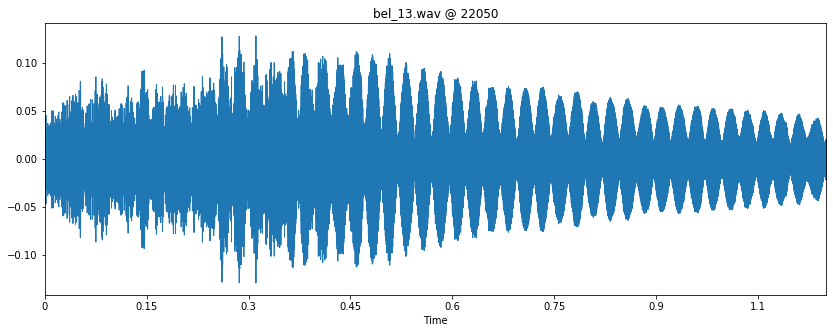

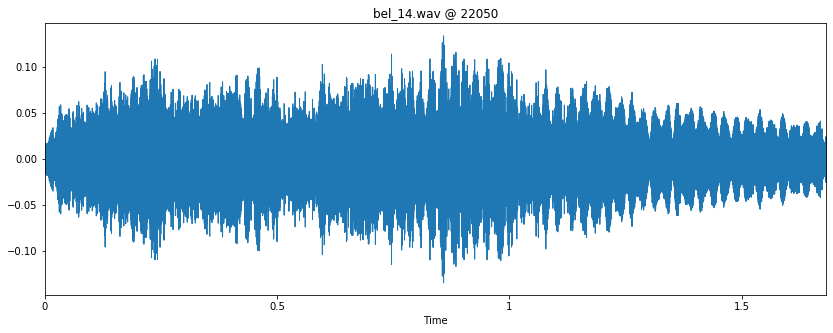

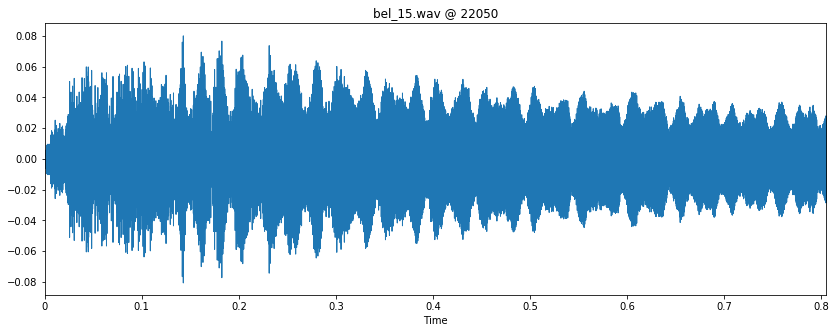

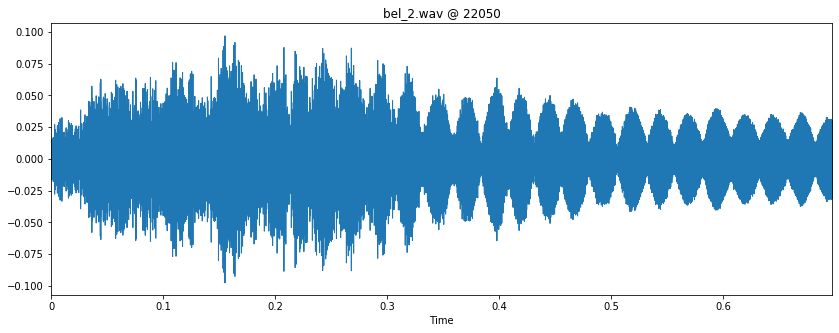

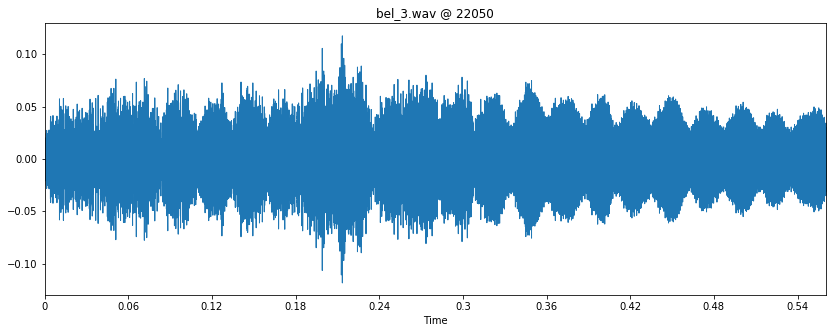

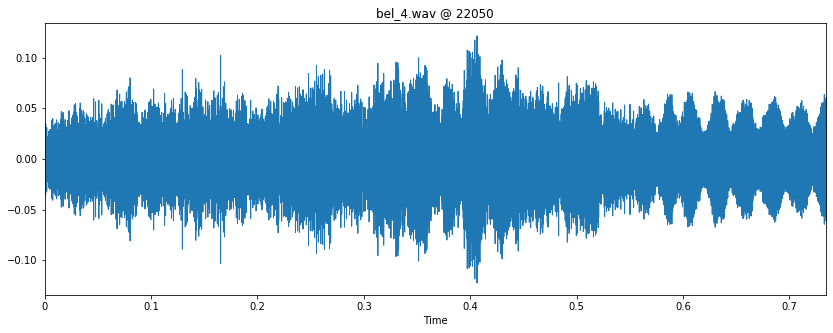

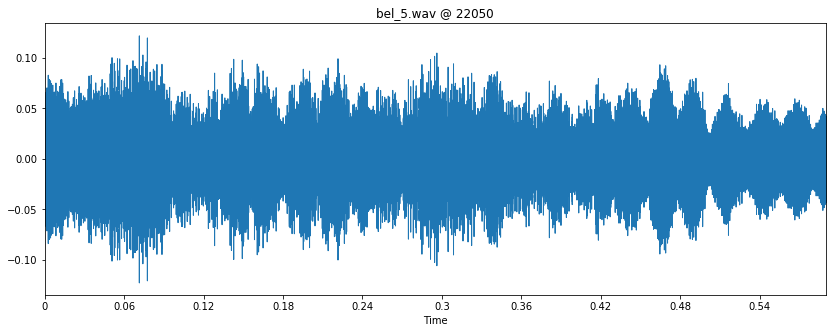

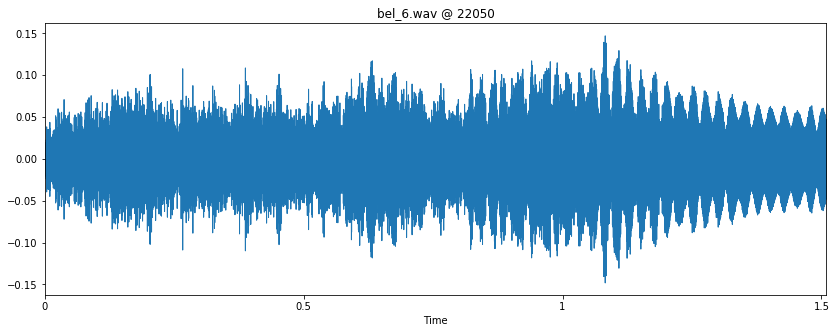

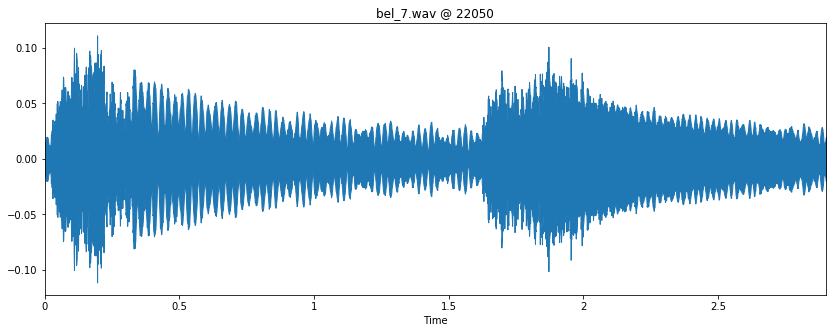

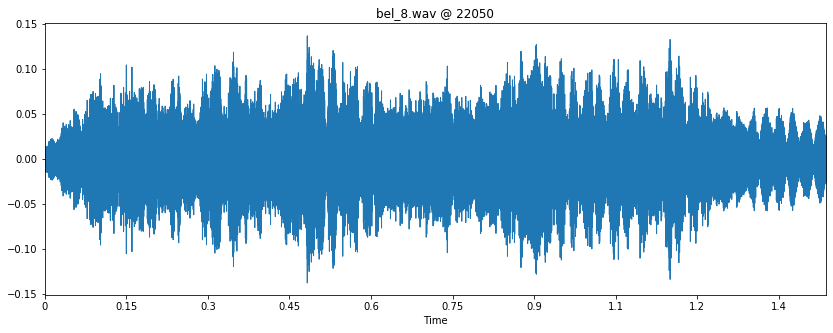

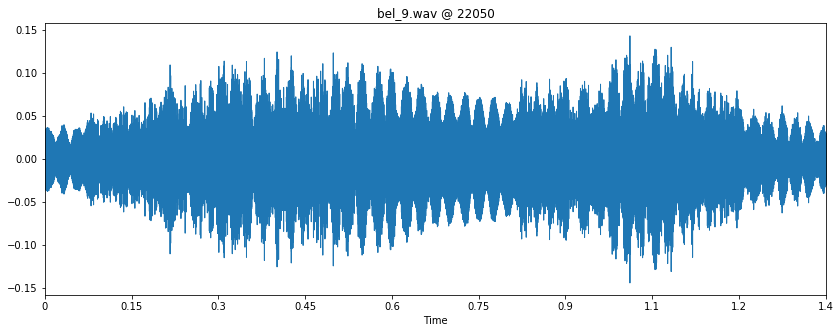

In [59]:
data_dir = '../split_data/'
clips = []
for bell_name in os.listdir(data_dir):
    x , sr = librosa.load(os.path.join(data_dir, bell_name))
    clips.append(x)
    plt.figure(figsize=(14, 5))
    plt.title(f'{bell_name} @ {sr}')
    librosa.display.waveplot(x, sr=sr)

In [60]:
print(len(clips))
print(clips[0])
print(clips[0].shape)

15
[-0.01334029 -0.01261258 -0.0028376  ...  0.02480876  0.00812923
  0.        ]
(17413,)


In [61]:
# Librosa default: 22.050 Hz
# 0.5s @ 22.050 Hz = 11.025 data points
# Step size: every 0.25 seconds = 5512 data points
window_size = 11025
skip = 5512

windows = []
for clip in clips:
    n_skips = math.floor((len(clip) - window_size) / skip)
    for n in range(window_size, window_size + (n_skips + 1) * skip, skip):
        windows.append(clip[n - window_size:n].copy())

/home/victor/hdd/envs/bell_det/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


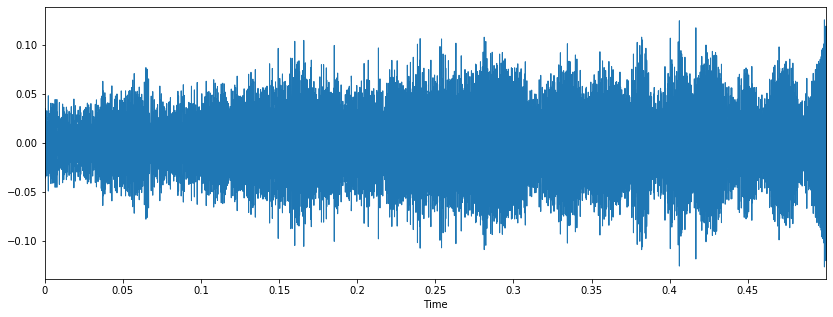

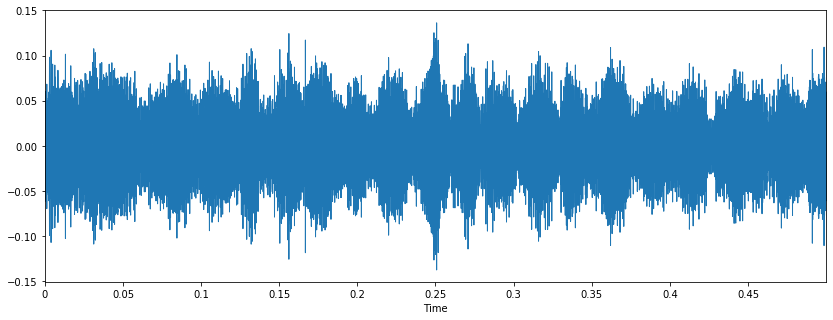

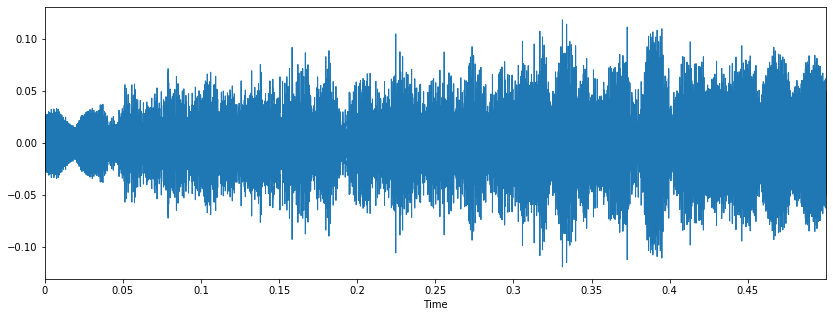

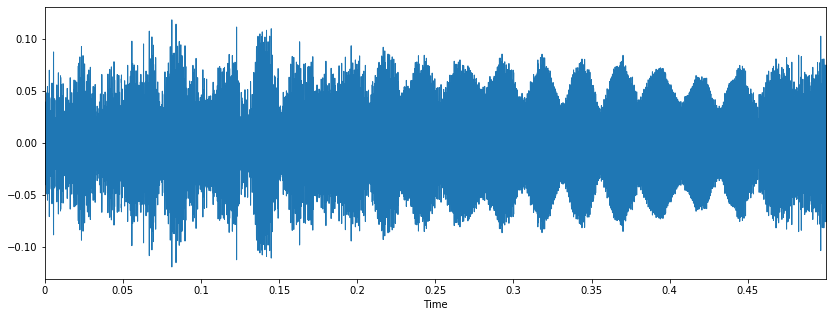

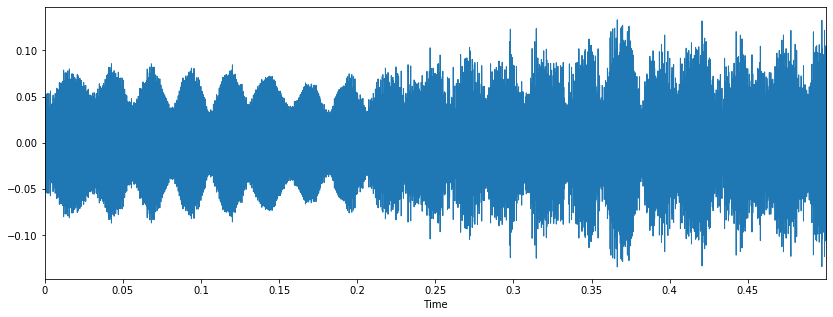

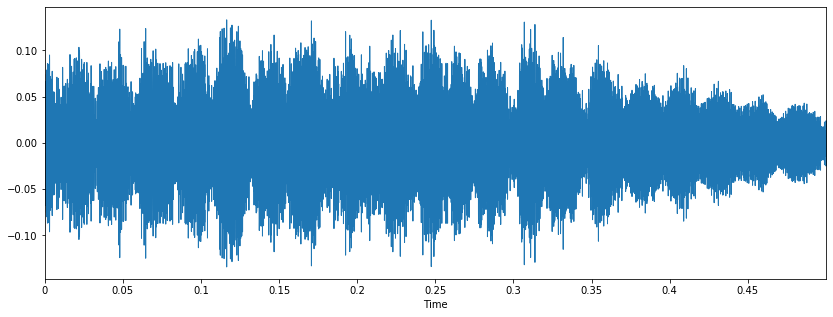

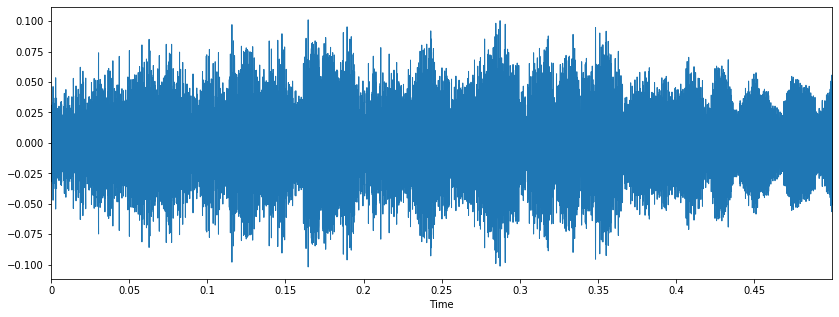

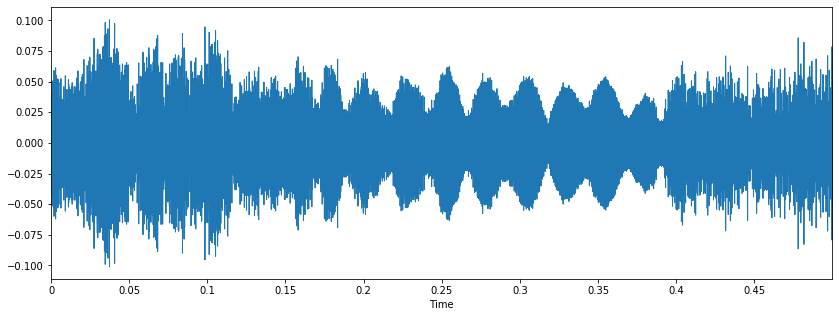

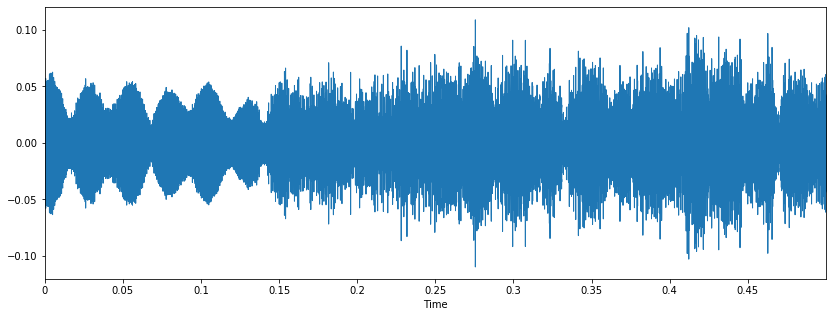

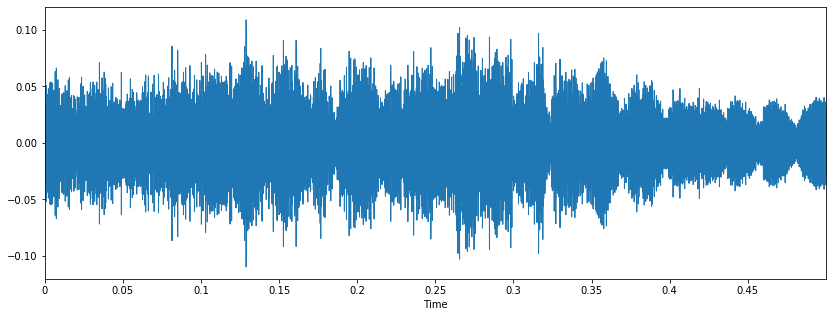

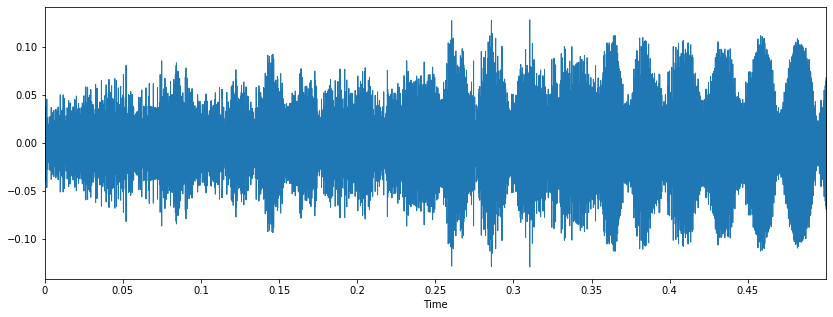

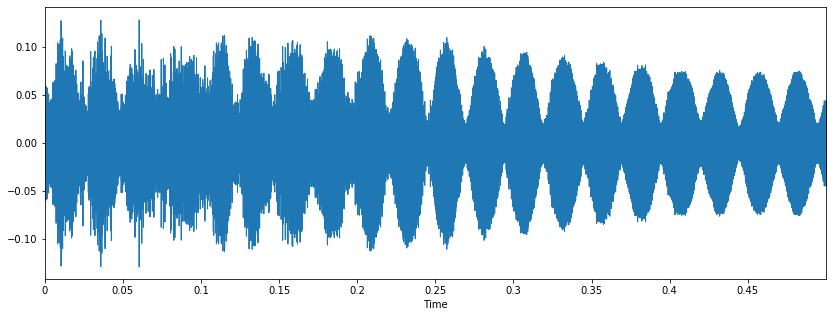

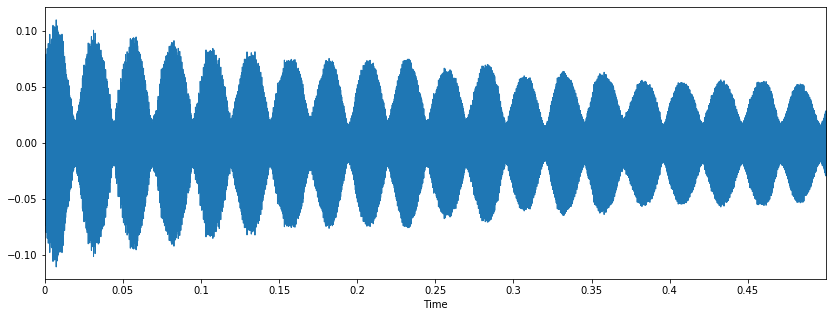

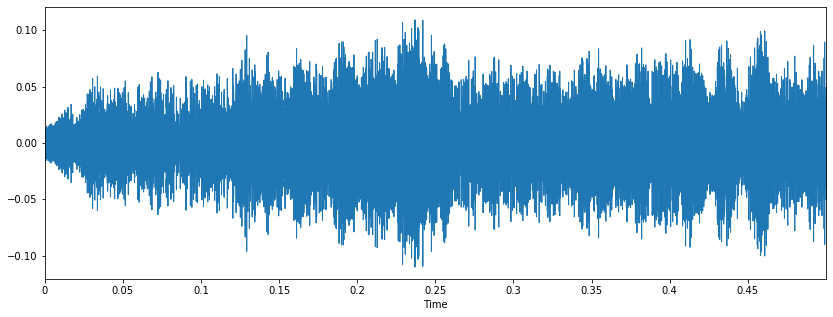

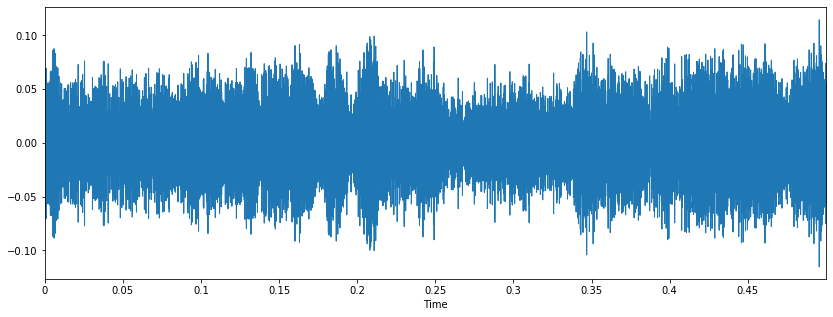

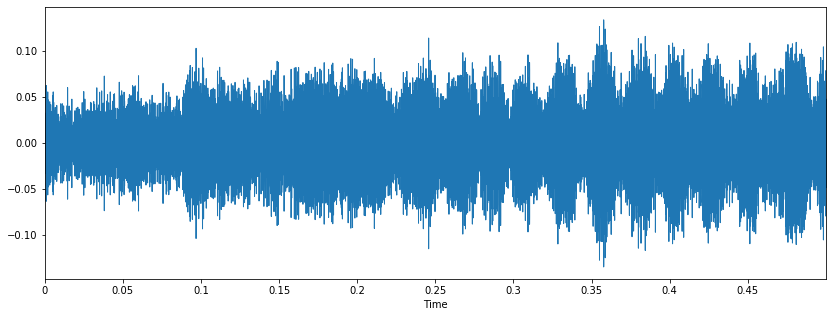

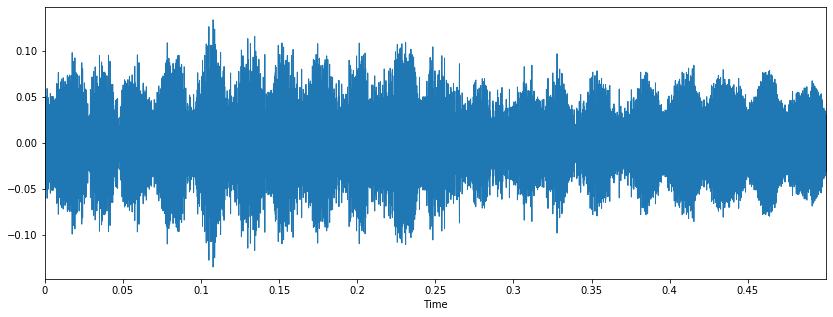

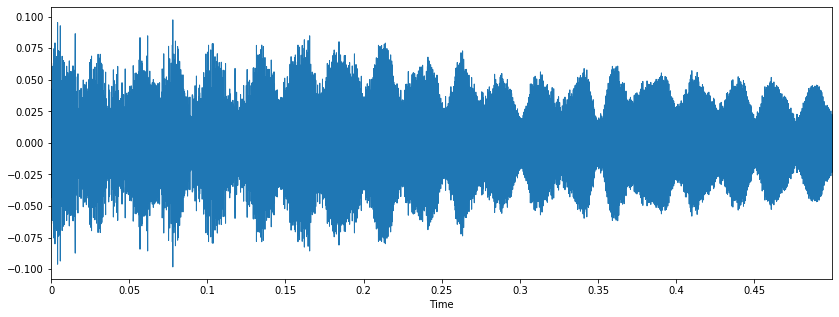

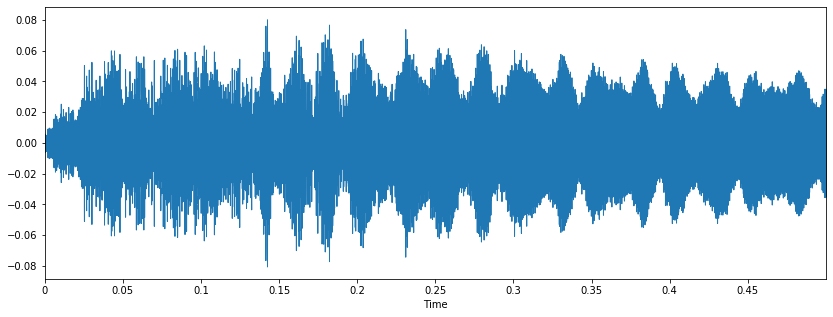

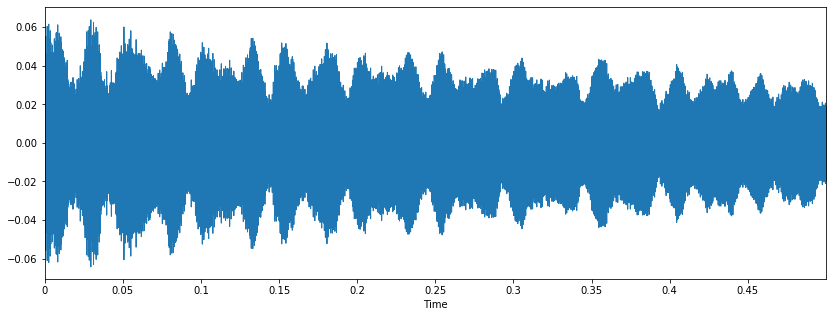

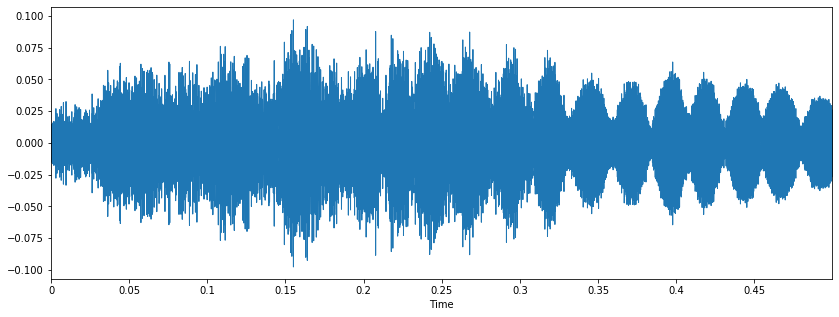

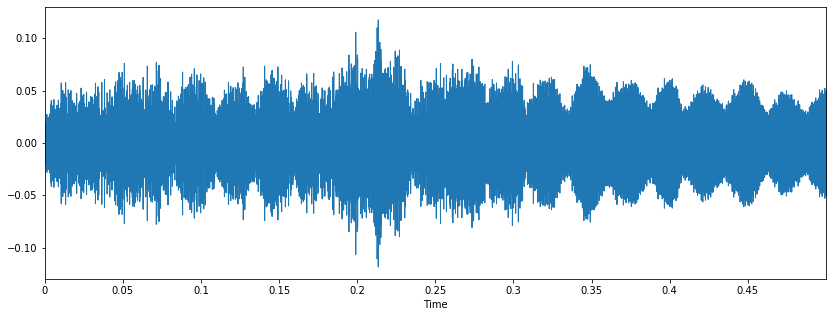

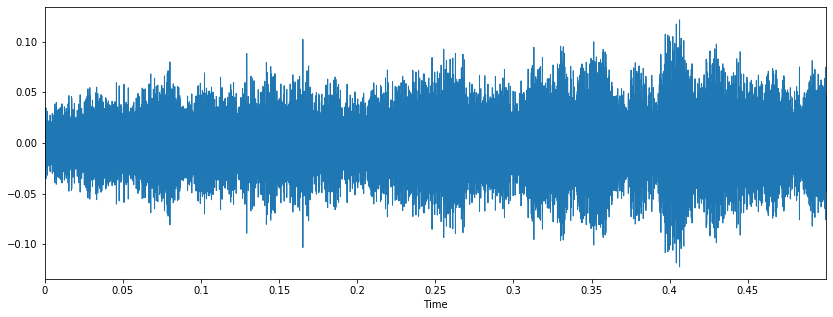

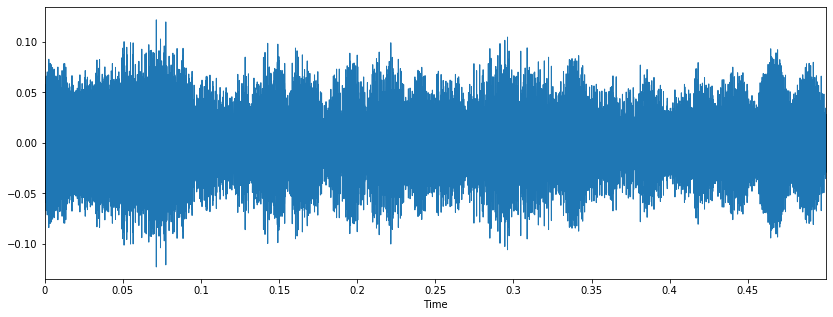

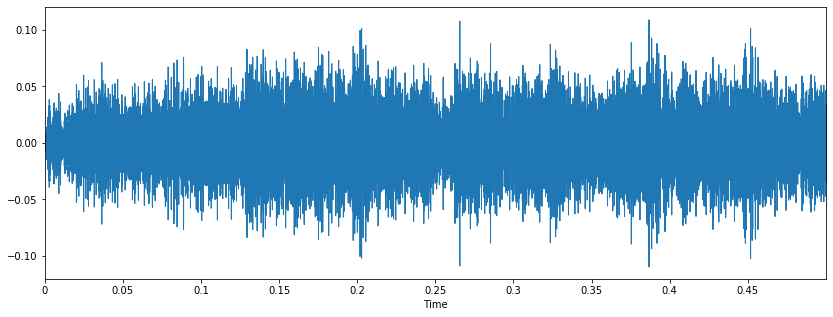

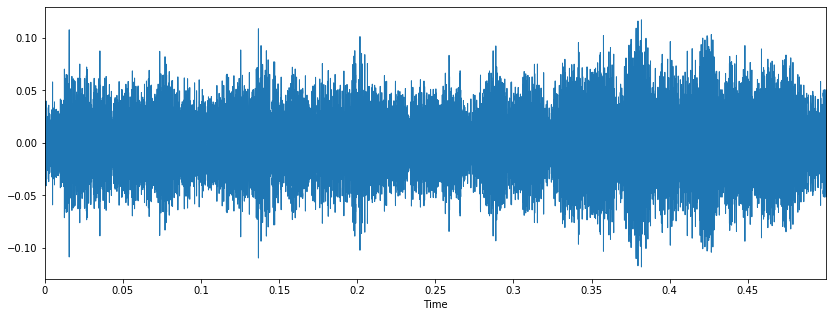

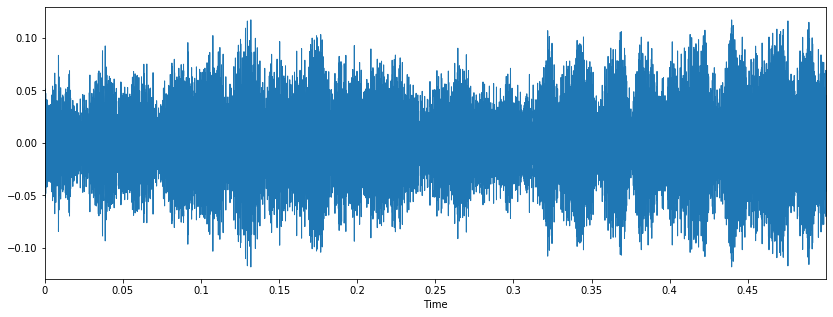

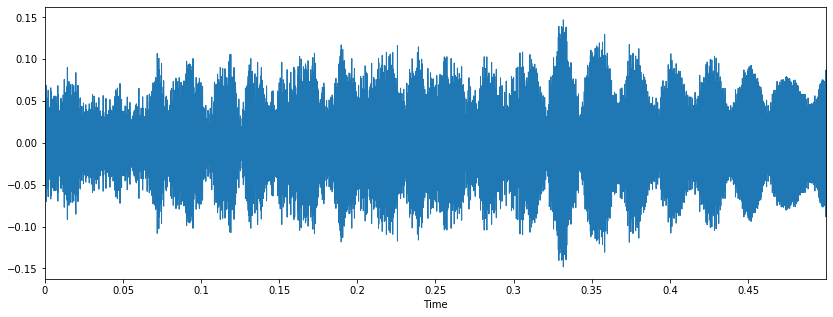

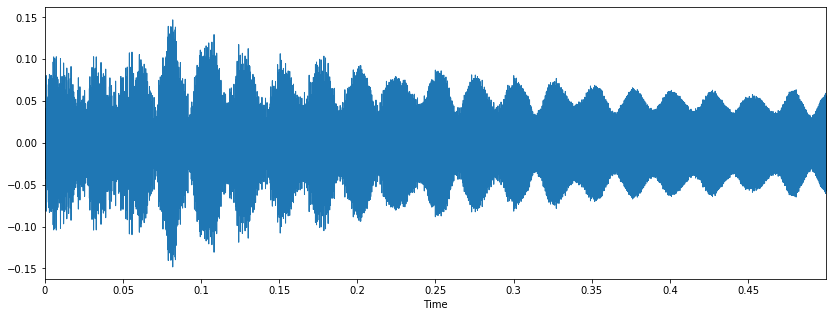

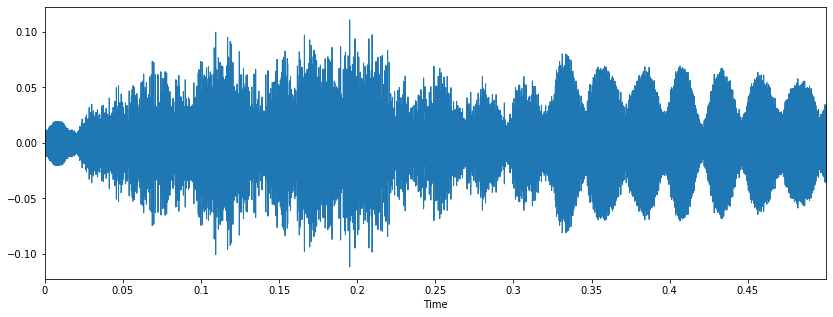

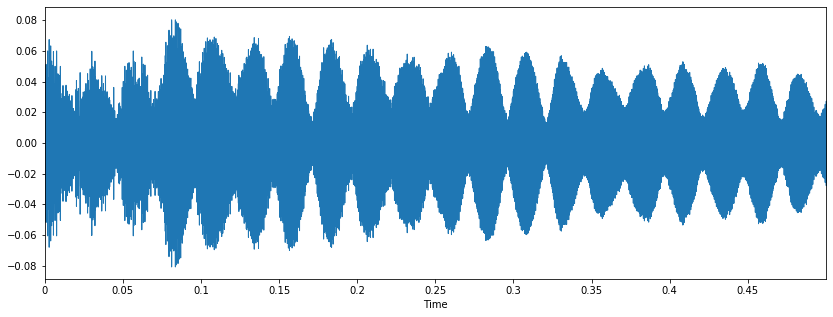

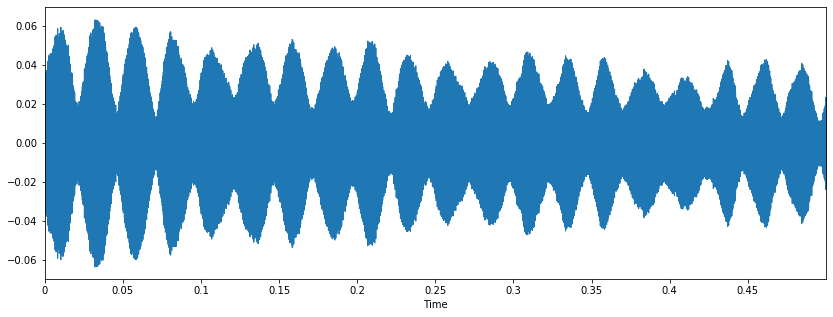

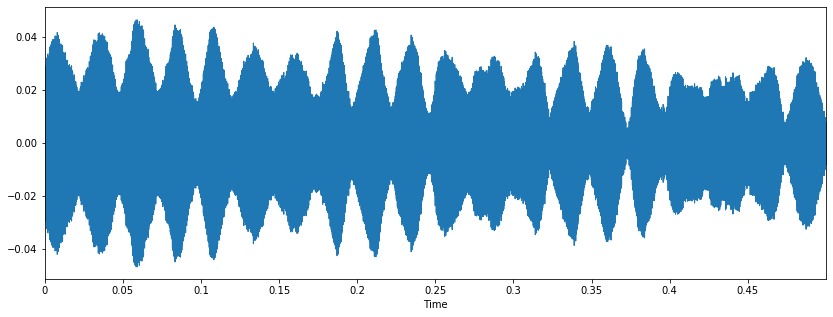

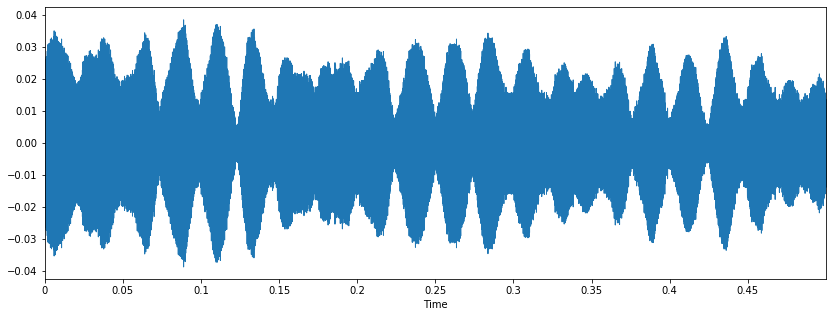

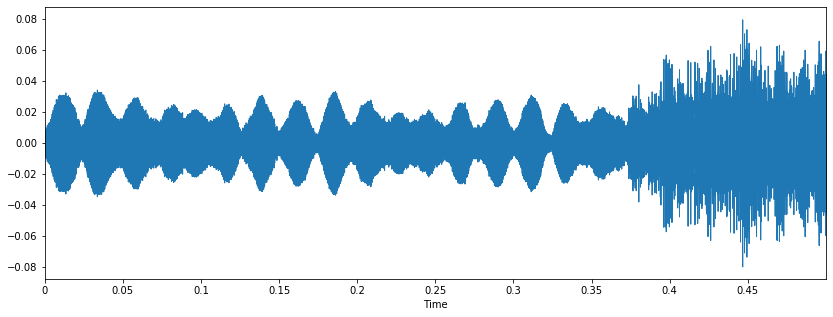

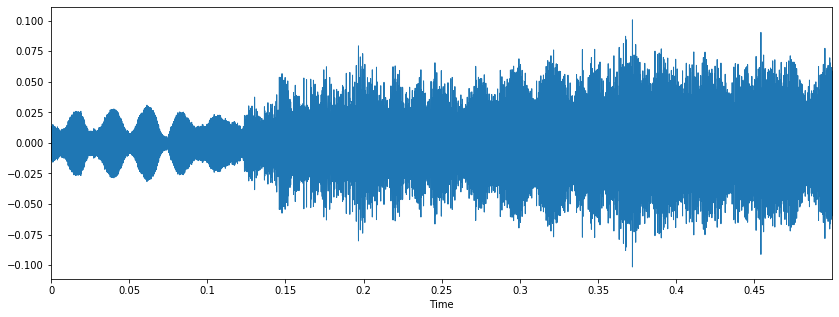

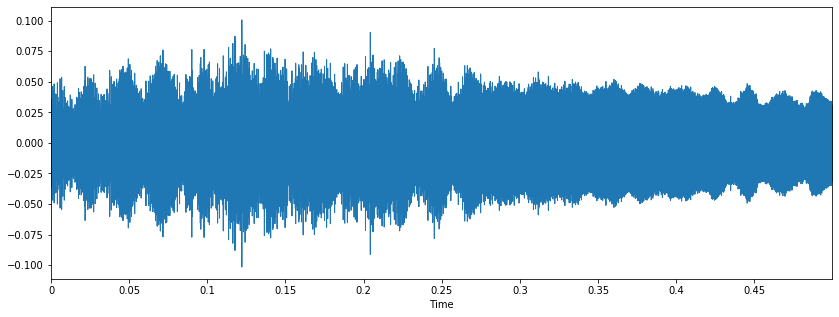

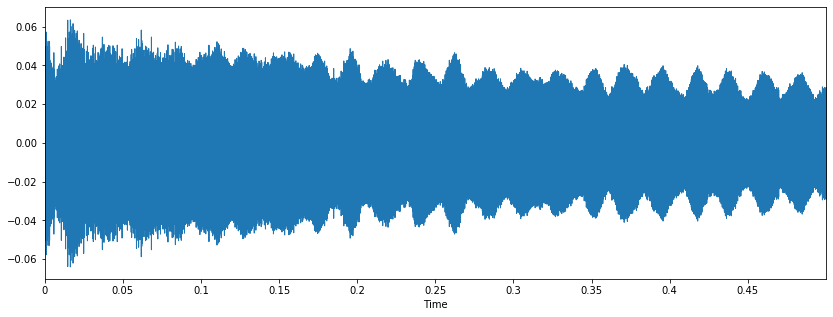

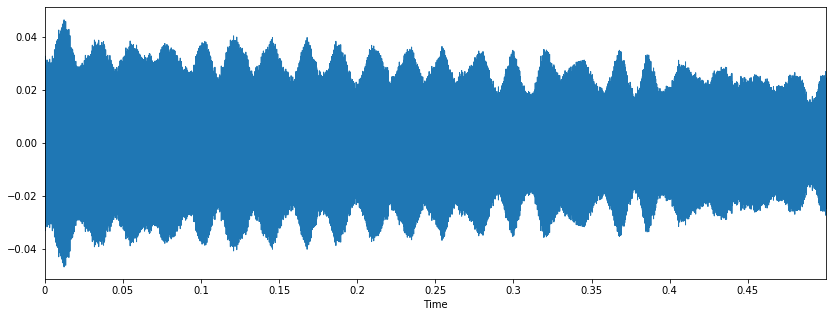

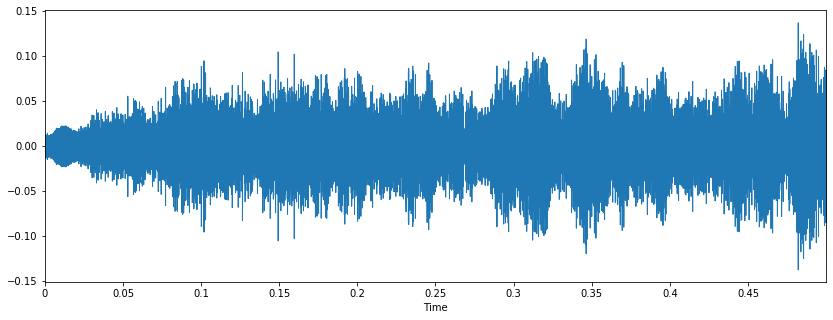

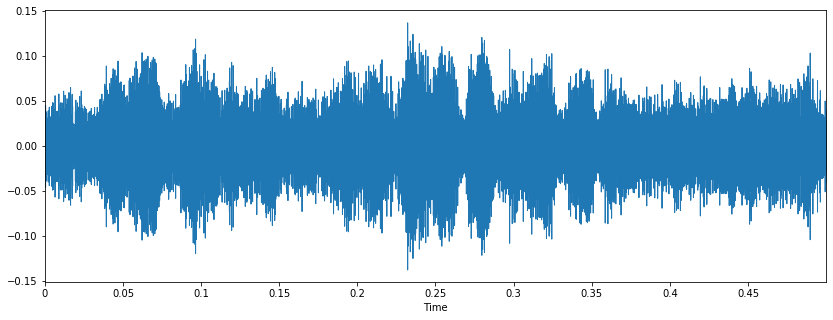

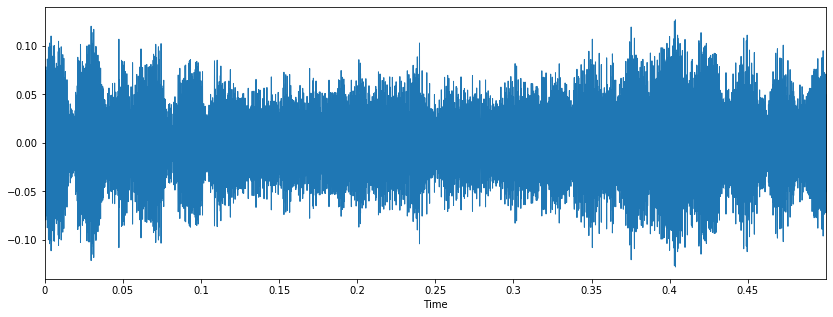

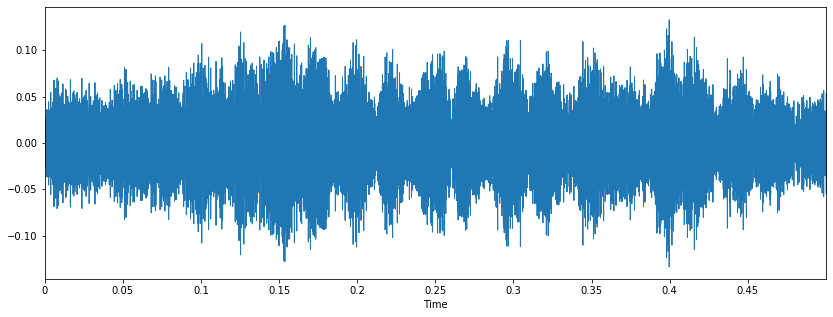

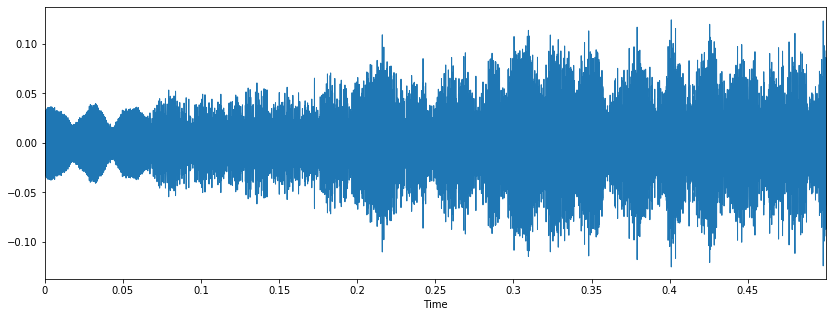

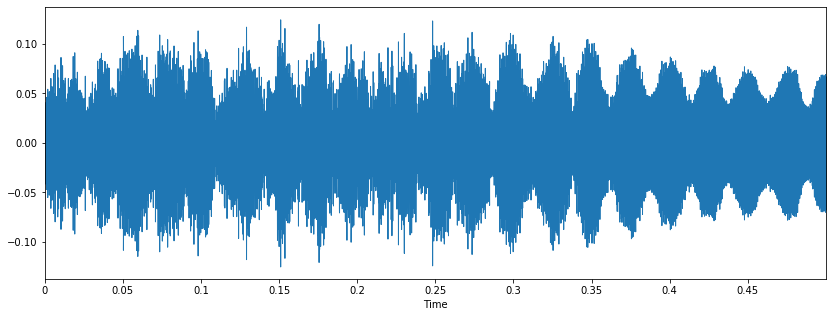

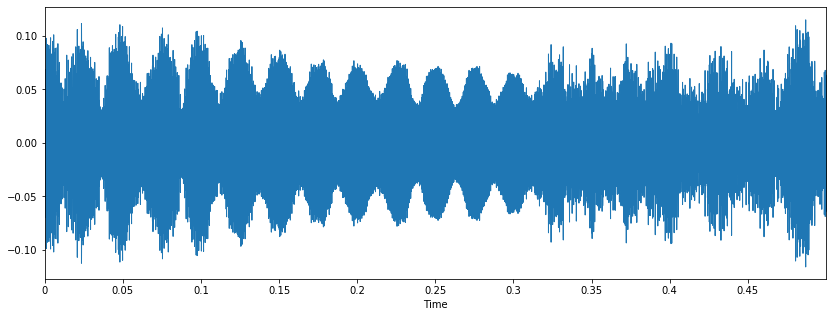

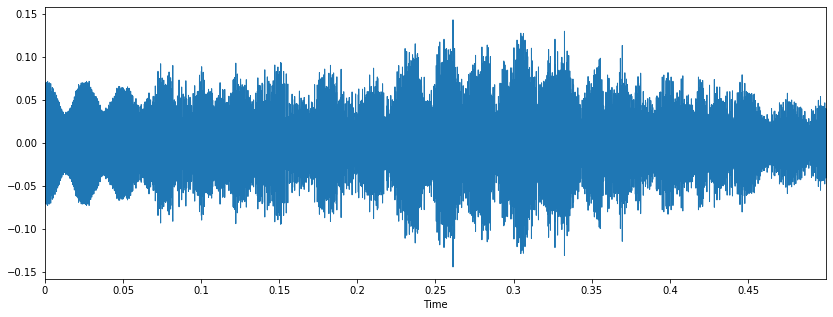

In [62]:
for window in windows:
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(window, sr=sr)

In [63]:
print(len(windows))

47


In [70]:
windows_array = np.array(windows)
with open('../windows_data/bell_windows.npy', 'wb') as f:
    np.save(f, windows_array)
print(windows_array.shape)

(47, 11025)


# Ambient Sounds

In [71]:
data_file = '../raw_data/ambient.wav'
x , sr = librosa.load(data_file)

In [73]:
len(x)

79380000

In [74]:
n_windows = len(x) / window_size
n_windows

7200.0

In [77]:
neg_windows = []
for i in tqdm(range(int(n_windows))):
    neg_window = x[i * window_size:(i + 1) * window_size]
    neg_windows.append(neg_window)

100%|██████████| 7200/7200 [00:00<00:00, 657987.38it/s]


In [78]:
len(neg_windows)

7200

In [79]:
neg_windows[0]

array([ 0.73545927,  1.0779227 ,  0.9501372 , ..., -0.02410489,
       -0.02327043, -0.0236268 ], dtype=float32)

In [80]:
neg_windows_array = np.array(neg_windows)
with open('../windows_data/noise_windows.npy', 'wb') as f:
    np.save(f, neg_windows_array)

# Sanity Check

In [85]:
sf.write('sanity_check_noise.wav', neg_windows[1], sr, subtype='PCM_24')
sf.write('sanity_check_bell.wav', windows[0], sr, subtype='PCM_24')